## Libraries and Definitions

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [252]:
sns.set(style="darkgrid", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.style.use("dark_background")

## Data Exploration

In [41]:
file_path = 'data/conversation_nps.csv'

Fix JSON and CSV filenames

In [42]:
import os
path = 'data/'
separator = '__'
items = [ name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [43]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    for filename in files:
        os.rename(path_to_items + filename, path_to_items + filename.replace('1_conversation_', '').split(separator,1)[0] + '.' + i)

Now we have all items with the same id pattern

In [44]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    #print(files)

In [45]:
df = pd.read_csv(file_path, header=None, usecols=[0,1], delimiter=';')
df = df.rename(columns={0: 'id', 1: 'rating'})

In [46]:
path_to_items

'data/output/'

In [47]:
vals = df.id.unique()
result = []
for root, dir, files in os.walk(path_to_items):
    for i in vals:
        if any(i in f for f in files):
            result.append(i)

In [48]:
len(result)

0

We have 988 files loaded in df that contains a phone register

In [49]:
df

,id,rating
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0
2,26614192-7d2d-4518-b315-c0ca74014461,5.0
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0
4,26670455-d46e-4a03-9e70-1560992ff04f,NaN
...,...,...
996,3f333e1f-67b5-48db-9112-1fd036f952c8,NaN
997,3f363ffb-ce63-439c-a3dd-0458f25476b7,NaN
998,3f41cbb4-3d15-4134-8eac-97506e2cf340,NaN
999,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0


In [50]:
df.rating.value_counts()

5.0    272
4.0     19
1.0      9
3.0      4
2.0      2
Name: rating, dtype: int64

Merging CSV Files

In [51]:
path_to_csv = path + 'csv/'
path_to_csv

'data/csv/'

In [52]:
csv_files = os.listdir(path_to_csv)

In [53]:
filtered = []

for f in csv_files:
    data = pd.read_csv(
        path_to_csv + f,
        index_col=[0]
    )
    data['id'] = f.replace('.csv', '')
    filtered.append(data)

In [54]:
concated = pd.concat(filtered, ignore_index=True)

In [55]:
df.sample(3)

,id,rating
711,378b9381-9720-4b40-b1a6-033f26342f56,5.0
670,36be70fa-2e9a-4262-bf45-d6c6a3abc1c7,NaN
119,29158756-24e5-4afa-af8c-9e826c994b8d,NaN


In [56]:
concated.sample(3)

,start_time,end_time,speaker,comment,id
38775,0:02:01,0:02:02,ch_0,porque eu desinstale o aplicativo né do sicred...,3420f68b-2d80-4cfd-83e7-82a849b806a4
49443,0:13:21,0:13:21,ch_0,tá okay!,37c74cb2-fd1b-45d6-b7dd-819420688218
4179,0:32:35,0:32:35,ch_0,"okay, eu tenho! Eu tenho assim como acompanhar...",27c462b8-7688-4318-9d8b-88964404072b


In [57]:
inner_df = pd.merge(df, concated, how='inner', on='id')

In [58]:
inner_df

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...
1,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:12,0:00:13,ch_0,bom dia! Meu nome é #######
2,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:14,0:00:14,ch_1,tudo bem. ######! Como eu posso te ajudar?
3,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:18,0:00:19,ch_0,"O cartão, esse cartão ou conta jurídica? Ele t..."
4,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:31,0:00:31,ch_1,É Vamos dar uma olhadinha. Qual é o teu CPF?
...,...,...,...,...,...,...
68755,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:04,0:27:04,ch_1,##### e #### ###### ####.
68756,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:06,0:27:07,ch_0,##### e #### ###### Muito obrigado pela sua at...
68757,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:08,0:27:10,ch_1,Eu que agradeço se puder no final ## ligação. ...
68758,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:16,0:27:16,ch_0,"Tá, pode deixar que vou avaliá Muito obrigada,..."


## General NPS Analysis

In all dataset we just have 306 not-null values for nps-rating

In [59]:
df.rating.value_counts().sum()

306

In [60]:
inner_df.groupby('id').rating.first().value_counts().sum()

305

We have A LOT of 5 stars rating for our customer service

In [61]:
exp = df.copy()
exp2 = exp.copy()

In [62]:
exp.rating = exp.rating.fillna('No Review')
exp2.dropna(subset='rating', inplace=True)

In [63]:
exp.sort_values

,id,rating
328,2ea8ad9e-1dac-4d89-a17a-4f2c90b20a22,No Review
968,3e944c94-7036-4136-beee-aff9819ded67,5.0
956,3e4a51a5-56ca-4df9-95a0-4065c18e4a1b,No Review
945,3ded3a0f-0bec-4367-8c15-0376404c01b9,No Review
385,2fdcbde1-c39a-4fc1-a5d7-8eceeae186f2,No Review


Text(0.5, 1.0, 'Customers vs Rating (Values)')

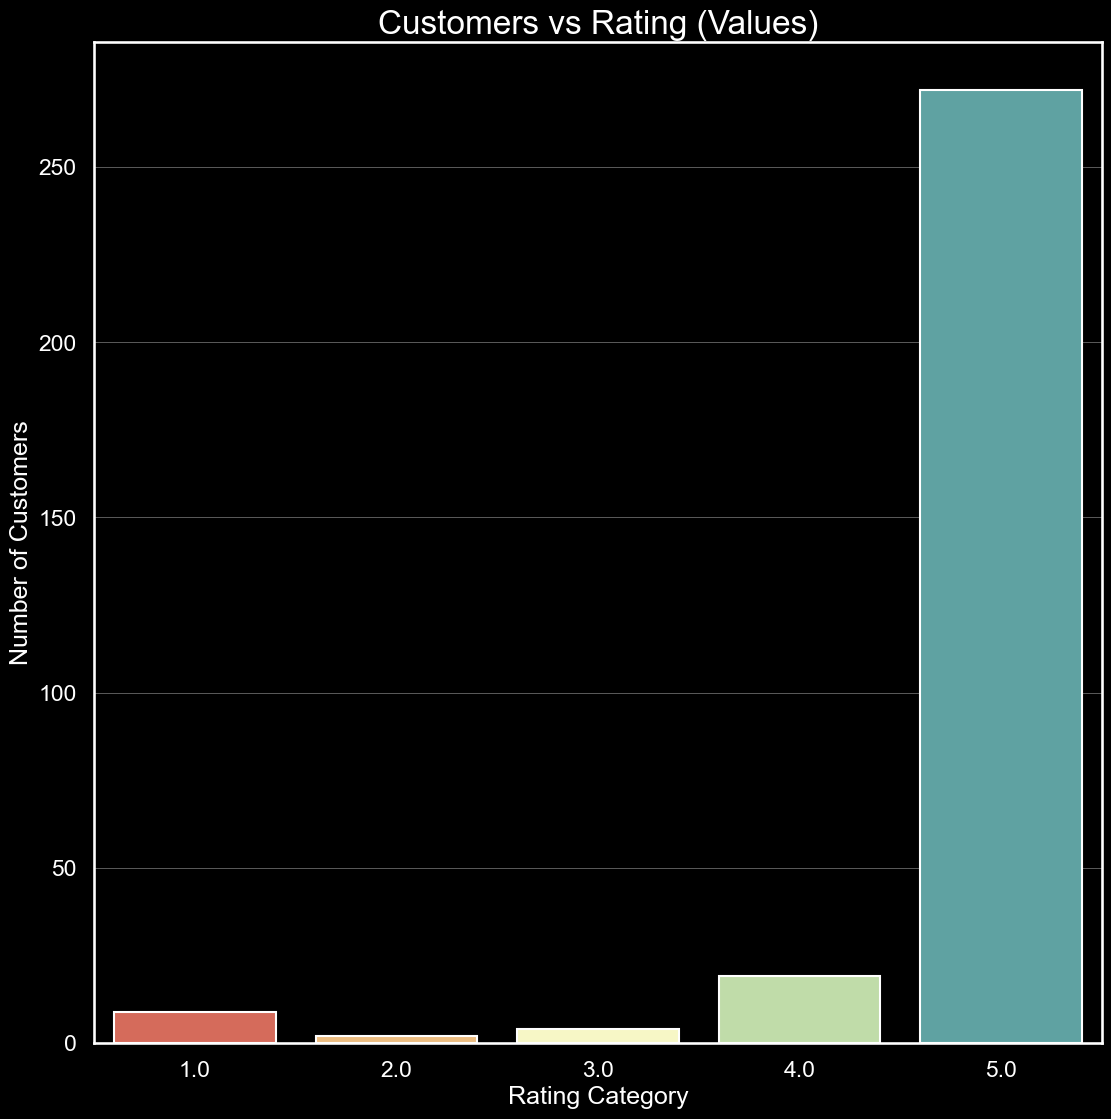

In [260]:
fig, ax = plt.subplots(figsize = (13,13))
sns.countplot(x='rating', data=exp2, palette='Spectral')
ax.set_xlabel( "Rating Category" , size = 18)
ax.set_ylabel( "Number of Customers" , size = 18)
ax.set_title( "Customers vs Rating (Values)" , size = 24 )

In [240]:
data_per

,index,rating
0,No Review,0.694306
1,5.0,0.271728
2,4.0,0.018981
3,1.0,0.008991
4,3.0,0.003996
5,2.0,0.001998


Text(0.5, 1.0, 'Customers vs Rating (%)')

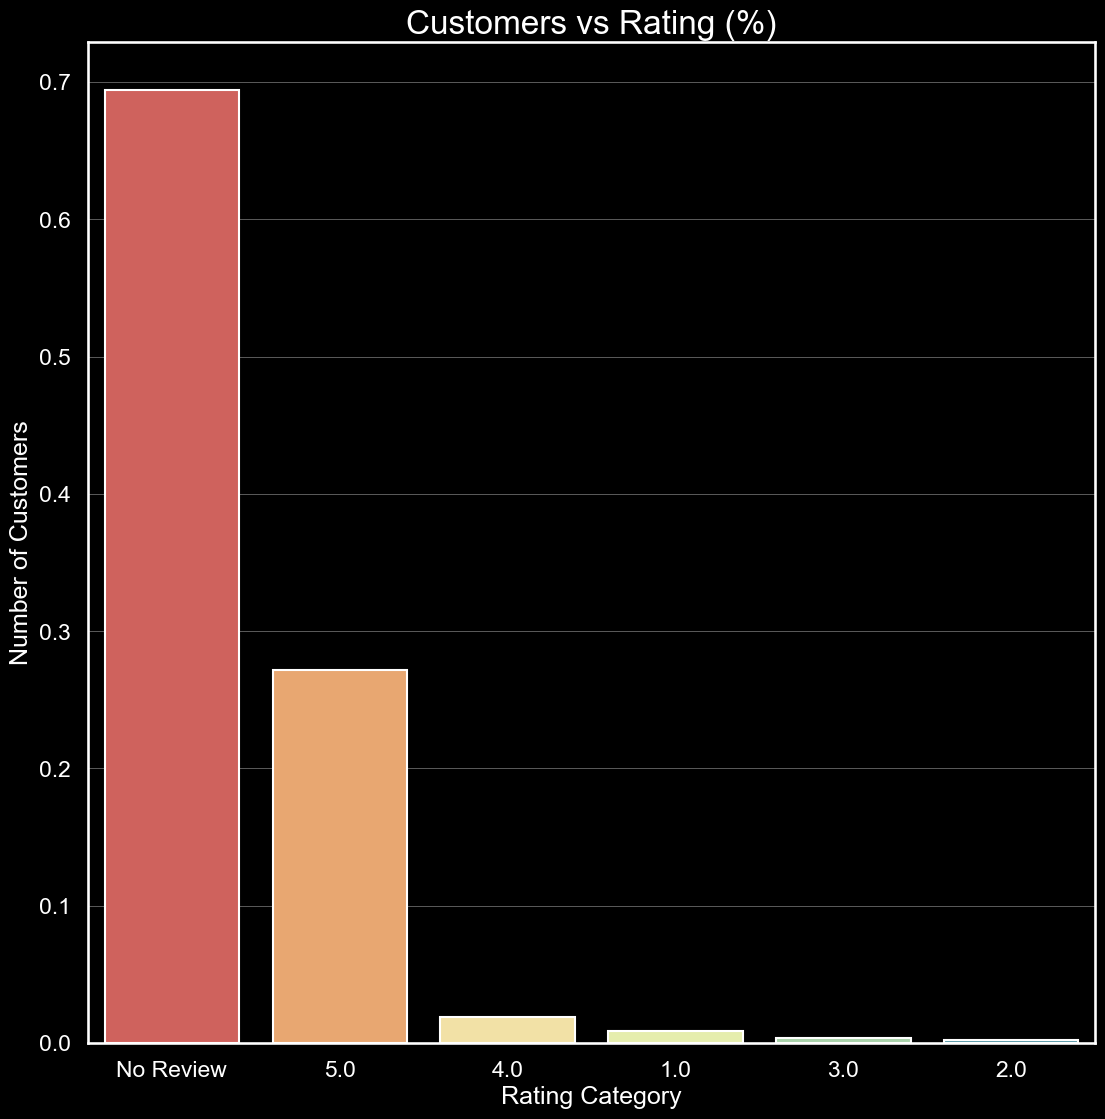

In [258]:
data_per = exp.rating.value_counts(normalize=True).reset_index()
fig, ax = plt.subplots(figsize = (13,13))
sns.barplot(y='rating', x='index', data=data_per, palette='Spectral')
ax.set_xlabel( "Rating Category" , size = 18)
ax.set_ylabel( "Number of Customers" , size = 18)
ax.set_title( "Customers vs Rating (%)" , size = 24 )

In [65]:
new_rating = []
for row in exp['rating']:
    
    if row == 'No Review':
        new_rating.append('No Review')
    elif row < 5.0:
        new_rating.append('Others')
    else:
        new_rating.append(5.0)
        
exp['unbalanced_rating'] = new_rating

In [66]:
exp.unbalanced_rating.value_counts()

No Review    695
5.0          272
Others        34
Name: unbalanced_rating, dtype: int64

Text(0.5, 1.0, 'Customers vs Rating Classification')

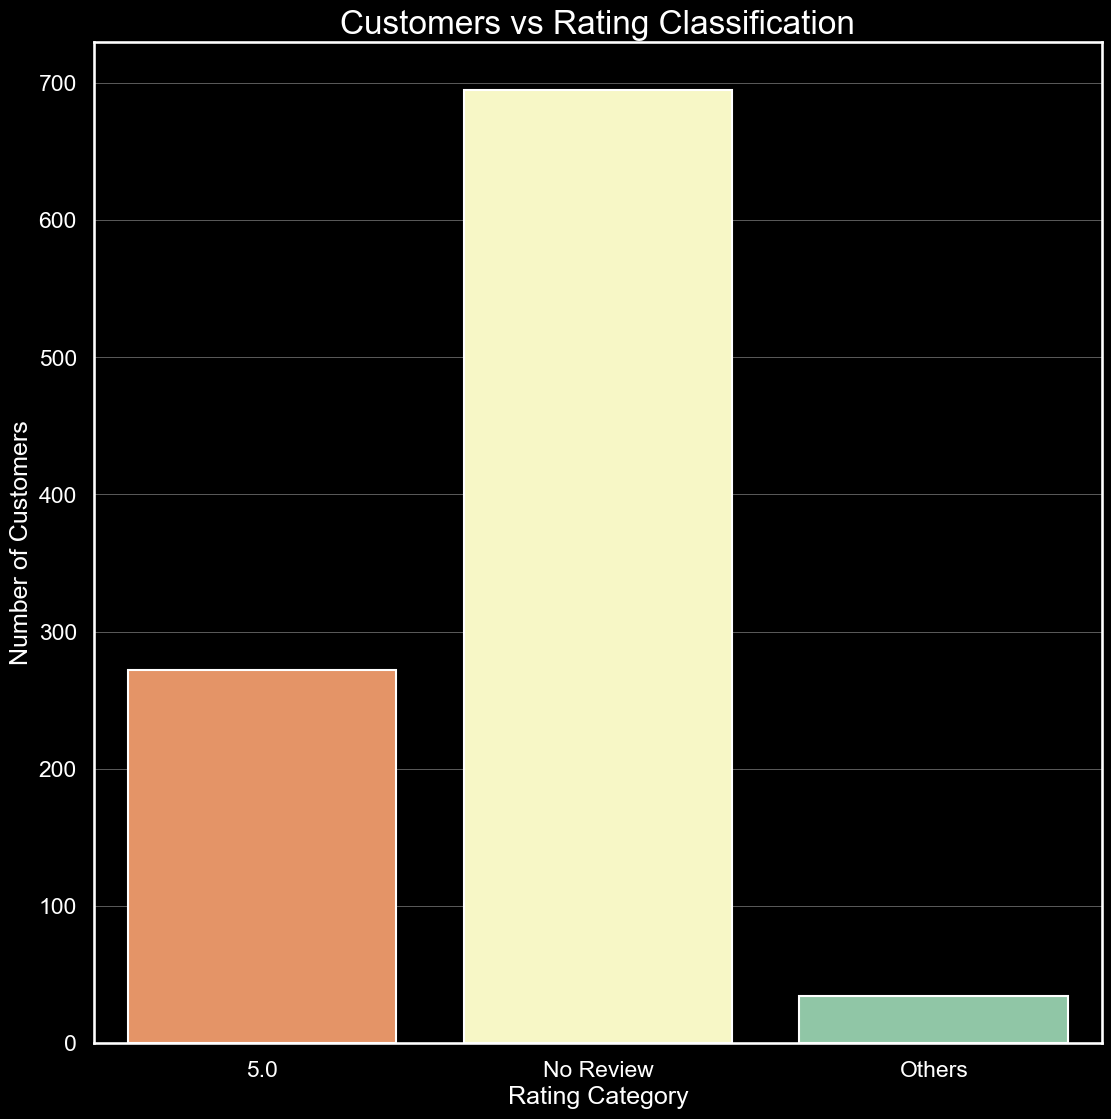

In [259]:
fig, ax = plt.subplots(figsize = (13,13))
sns.countplot(x='unbalanced_rating', data=exp, palette='Spectral')
ax.set_xlabel( "Rating Category" , size = 18)
ax.set_ylabel( "Number of Customers" , size = 18)
ax.set_title( "Customers vs Rating Classification" , size = 24 )

In [68]:
nps_rating = []
for row in exp2['rating']:
    if (row >= 4.0):
        nps_rating.append('Promoters')
    elif (row >= 3.0):
        nps_rating.append('Passive')
    else:
        nps_rating.append('Detractors')
exp2['nps_rating'] = nps_rating

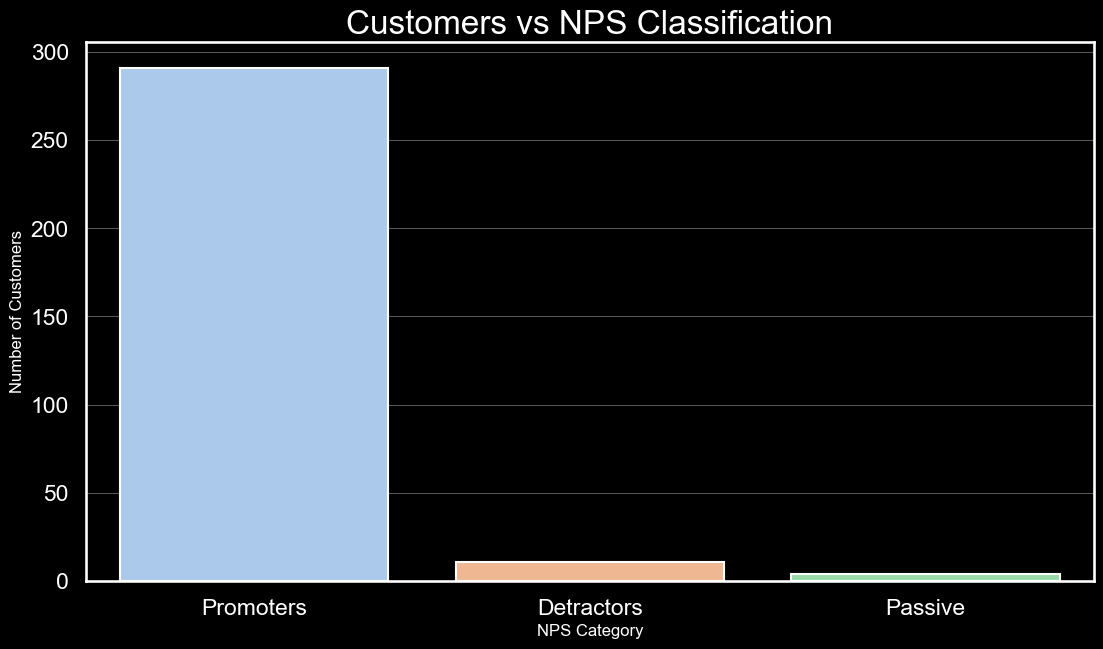

In [262]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='nps_rating', data=exp2, palette="pastel")
ax.set_xlabel( "NPS Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs NPS Classification" , size = 24 )
plt.show()


In [266]:
nps_per

,index,nps_rating
0,Promoters,0.950980
1,Detractors,0.035948
2,Passive,0.013072


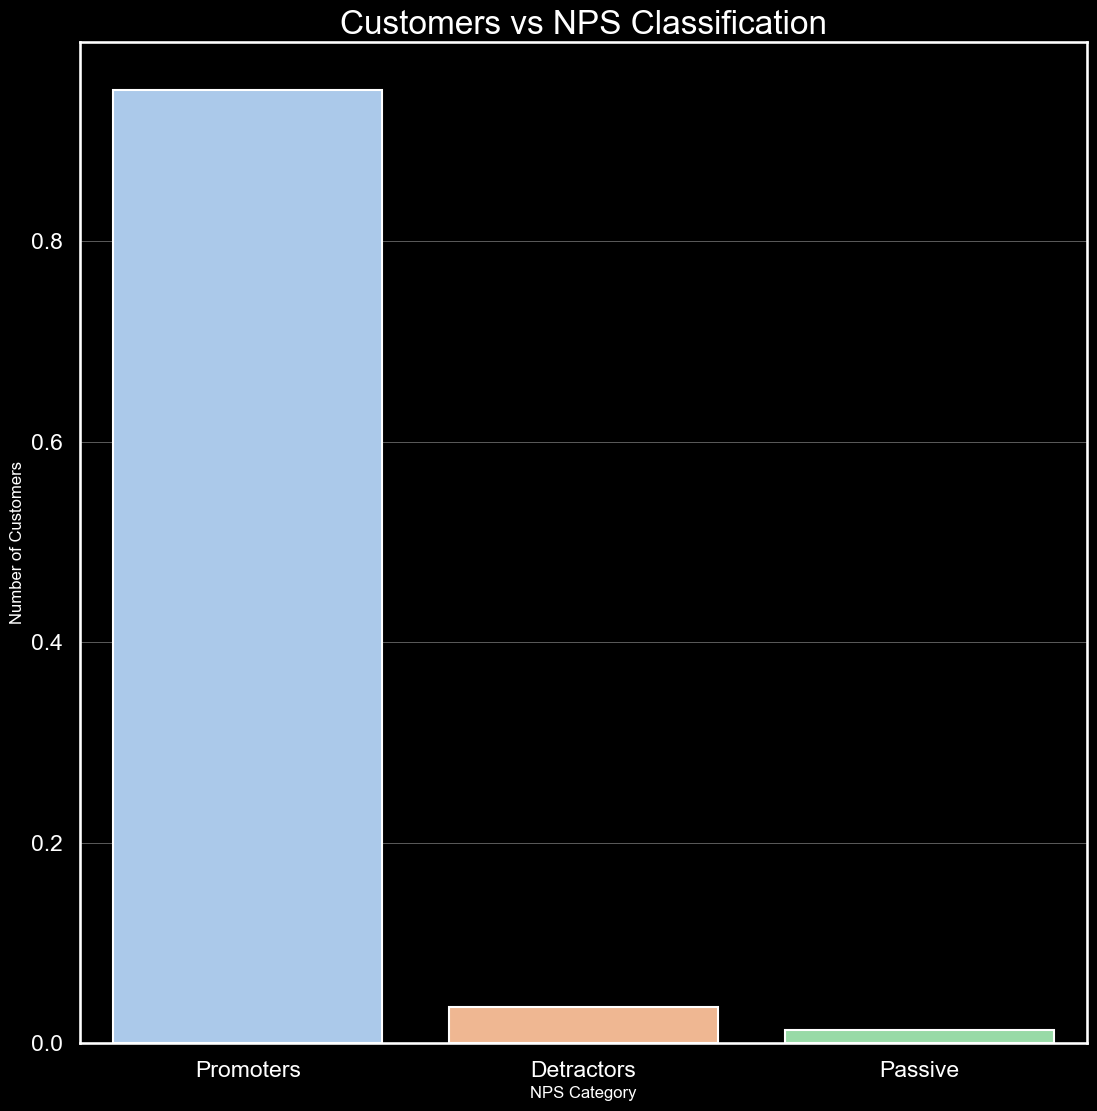

In [264]:
nps_per = exp2.nps_rating.value_counts(normalize=True).reset_index()
fig, ax = plt.subplots(figsize = (13,13))
sns.barplot(y='nps_rating', x='index', data=nps_per, palette="pastel")
ax.set_xlabel( "NPS Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs NPS Classification" , size = 24 )
plt.show()

In [70]:
inner_df.isna().sum()

id                0
rating        45923
start_time        0
end_time          0
speaker           0
comment           0
dtype: int64

In [71]:
agg_funcs = {'rating' : 'first',
            'comment' : 'size', 
            'end_time': 'last' }

In [72]:
relation_rating_comment = inner_df.groupby('id').agg(agg_funcs).reset_index().rename(columns={'comment': 'number_comments', 'end_time': 'minutes'})
relation_rating_comment.minutes = pd.to_datetime(relation_rating_comment.minutes, format='%H:%M:%S').dt.minute

In [73]:
relation_rating_comment.isna().sum()

id                   0
rating             683
number_comments      0
minutes              0
dtype: int64

In [74]:
relation_rating_comment.rating.fillna('No Review', inplace=True)

In [271]:
relation_rating_comment.query('rating == 3.0').minutes.median()

22.0

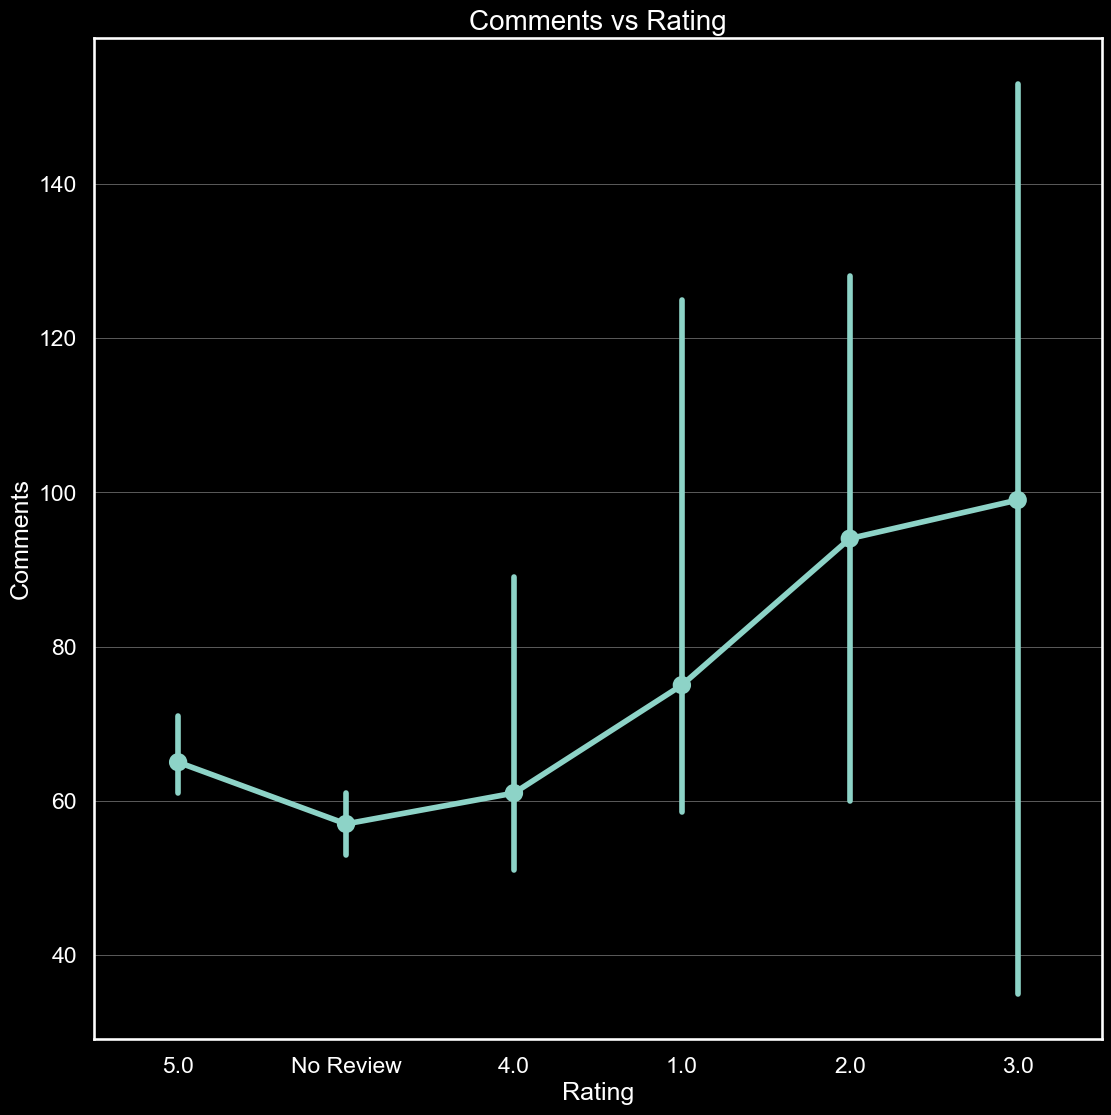

In [267]:
fig, ax = plt.subplots(figsize = (13,13))
sns.pointplot(data=relation_rating_comment, x='rating', y='number_comments', estimator='median')
ax.set_ylabel( "Comments" , size = 18)
ax.set_xlabel( "Rating" , size = 18)
ax.set_title( "Comments vs Rating" , size = 20 )
plt.show()

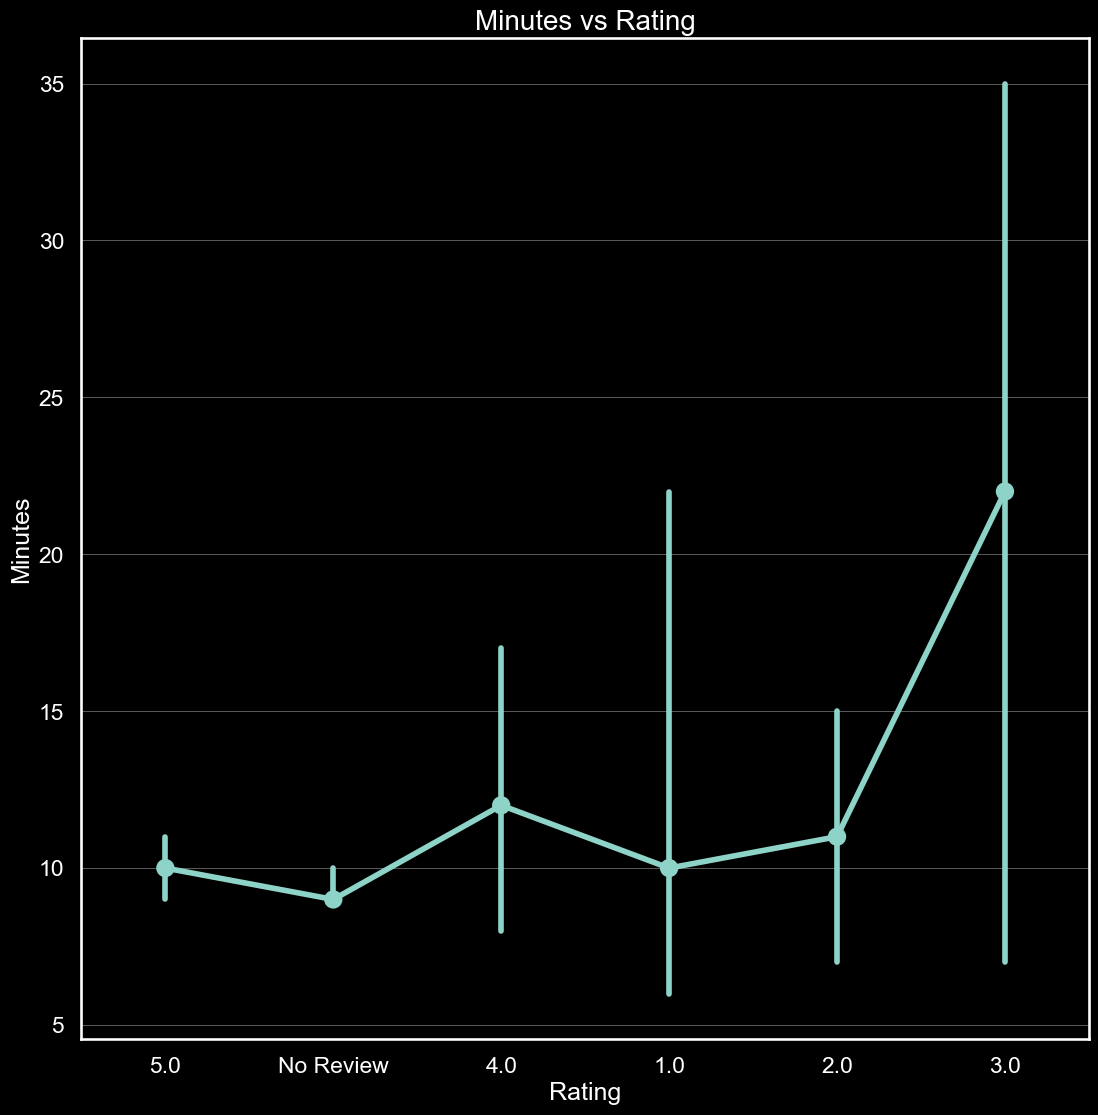

In [274]:
fig, ax = plt.subplots(figsize = (13,13))
sns.pointplot(data=relation_rating_comment, x='rating', y='minutes', estimator='median')
ax.set_ylabel( "Minutes" , size = 18)
ax.set_xlabel( "Rating" , size = 18)
ax.set_title( "Minutes vs Rating" , size = 20 )
plt.show()

In [298]:
relation_rating_comment

,id,rating,number_comments,minutes
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,85,11
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0,87,9
2,26614192-7d2d-4518-b315-c0ca74014461,5.0,83,11
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0,21,4
4,26670455-d46e-4a03-9e70-1560992ff04f,No Review,83,11
...,...,...,...,...
983,3f327a25-e87d-4c61-9327-9aa9f35a6ce7,4.0,37,17
984,3f333e1f-67b5-48db-9112-1fd036f952c8,No Review,264,48
985,3f363ffb-ce63-439c-a3dd-0458f25476b7,No Review,70,18
986,3f41cbb4-3d15-4134-8eac-97506e2cf340,No Review,102,15


In [296]:
x = np.quantile(relation_rating_comment.number_comments, [0,0.25,0.5,0.75,1])

In [297]:
x

array([  1.,  37.,  61.,  91., 361.])

In [300]:
x[2]

61.0

In [307]:
relation_rating_comment = relation_rating_comment.replace({'No Review' : -1.0})
relation_rating_comment.rating = relation_rating_comment.rating.astype('float64')

In [309]:
nps_rating = []
for row in relation_rating_comment['rating']:
    if (row >= 4.0):
        nps_rating.append('Promoters')
    elif (row >= 3.0):
        nps_rating.append('Passive')
    else:
        nps_rating.append('Detractors')
relation_rating_comment['nps_rating'] = nps_rating

In [315]:
relation_rating_comment.nps_rating.value_counts()

Promoters     649
Passive       171
Detractors    168
Name: nps_rating, dtype: int64

In [313]:
relation_rating_comment.loc[(relation_rating_comment['rating'] == -1.0) & (relation_rating_comment['number_comments'] < x[2]),'nps_rating'] = 'Promoters'
relation_rating_comment.loc[(relation_rating_comment['rating'] == -1.0) & (relation_rating_comment['number_comments'] > x[2]) & \
     (relation_rating_comment['number_comments'] < x[3]),'nps_rating'] = 'Detractors'
relation_rating_comment.loc[(relation_rating_comment['rating'] == -1.0) & (relation_rating_comment['number_comments'] > x[3]),'nps_rating'] = 'Passive'

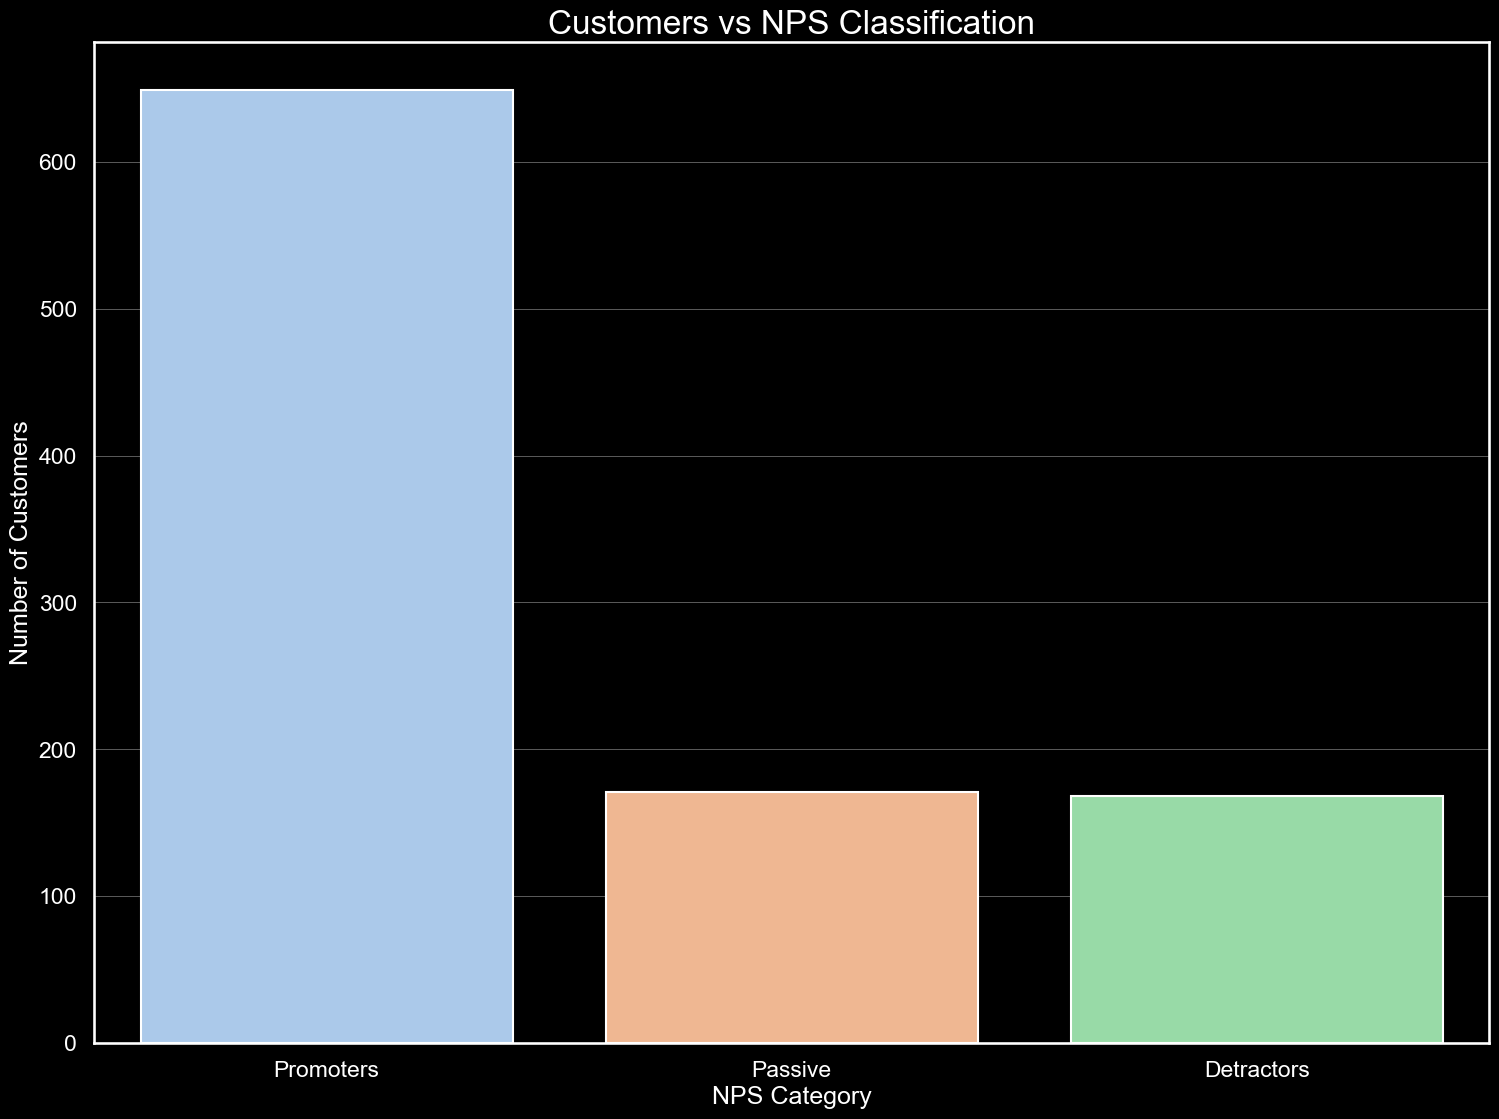

In [318]:
nps_per_2 = relation_rating_comment.nps_rating.value_counts().reset_index()
fig, ax = plt.subplots(figsize = (18,13))
sns.barplot(y='nps_rating', x='index', data=nps_per_2 , palette="pastel")
ax.set_xlabel( "NPS Category" , size = 18)
ax.set_ylabel( "Number of Customers" , size = 18)
ax.set_title( "Customers vs NPS Classification" , size = 24 )
plt.show()

Índice Geral de NPS Normal


In [281]:
exp2.nps_rating.value_counts(normalize=True).Promoters - exp2.nps_rating.value_counts(normalize=True).Detractors

0.9150326797385621

Índice Geral de NPS Alterado

In [319]:
relation_rating_comment.nps_rating.value_counts(normalize=True).Promoters - relation_rating_comment.nps_rating.value_counts(normalize=True).Detractors

0.4868421052631579

## NLP Analysis

In [78]:
import nltk
#nltk.download('stopwords')
from collections import Counter
import re
from nltk import ngrams

In [79]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [502]:
extra_list = ['t','pra','a','aqui','ento', 'no', 'eu', 'carto', 'n', 'pra']
stopwords.append(extra_list)

In [153]:
import re
def clean_text(data, column):
    data[column] = data[column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])\
        .lower().encode('ascii', errors='ignore').decode('utf-8')).replace('t ', 'ta ')
    data[column] = data[column].apply(lambda x: re.sub('\W+',' ', x)) 
    return data

In [82]:
def return_most_common(df, n_words, column, n_gram):
    all_text = [' '.join(df[column])]
    output_words = all_text[0].split()
    ctr = Counter(ngrams(output_words, n_gram))
    most_occur = ctr.most_common(n_words)
    return most_occur

98% of our conversation_id has actual data of comments and time 

In [83]:
len(inner_df.id.unique())/len(df)

0.987012987012987

Here we have all ratings with minutes of call and all customer comments in a string

In [84]:
sentiment_df = inner_df.query("speaker == 'ch_0'").drop(columns=['start_time']).rename(columns={'end_time' : 'duration'})
g = sentiment_df.groupby('id')
sentiment_df.duration = (g['duration'].transform('last'))
sentiment_df['minutes'] = pd.to_datetime(sentiment_df.duration, format='%H:%M:%S').dt.minute
sentiment_df.drop(columns=['duration'], inplace=True)

sentiment_df = sentiment_df.groupby('id').tail(10)

sentiment_df = sentiment_df.groupby('id').agg({'rating' : 'first',
                                                'speaker': 'first',
                                                'comment': ' '.join,
                                                'minutes': 'first' }).reset_index()
sentiment_df = clean_text(sentiment_df, 'comment')


sentiment_df

,id,rating,speaker,comment,minutes
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,ch_0,senha ah sim u pode falar t u sim u ento t jia...,11
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0,ch_0,sim t deixa perguntar outra coisa vai nmero c...,9
2,26614192-7d2d-4518-b315-c0ca74014461,5.0,ch_0,diminui valor parcela okay agradecer a caso ac...,11
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0,ch_0,queria saber detalhes caso fazer lance n cont...,4
4,26670455-d46e-4a03-9e70-1560992ff04f,NaN,ch_0,isso crdito carto n que dinheiro meu u existe ...,11
...,...,...,...,...,...
973,3f327a25-e87d-4c61-9327-9aa9f35a6ce7,4.0,ch_0,voc telefone isso t okay nome t jia eu fico ag...,16
974,3f333e1f-67b5-48db-9112-1fd036f952c8,NaN,ch_0,resumindo consegue fazer nada bloqueei meu car...,48
975,3f363ffb-ce63-439c-a3dd-0458f25476b7,NaN,ch_0,ah t obrigado hum faz assim pode conta poupana...,18
976,3f41cbb4-3d15-4134-8eac-97506e2cf340,NaN,ch_0,acha vou vou pra l mobi porque servio l lavour...,15


<AxesSubplot: >

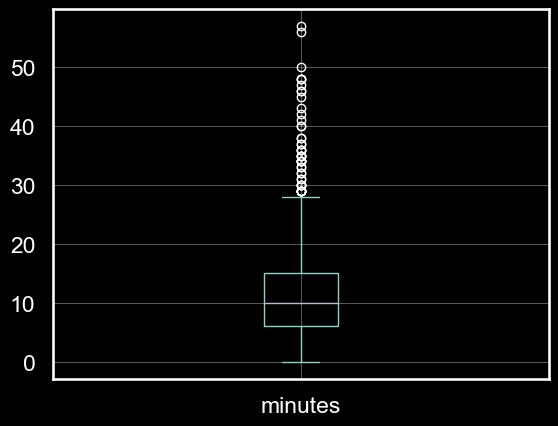

In [85]:
sentiment_df.minutes.plot(kind='box')

Sorting our dataset by comment len

In [86]:
sentiment_df['len'] = sentiment_df['comment'].str.len() 
sentiment_df = sentiment_df.sort_values(['len'], ascending=True)
sentiment_df = sentiment_df.query("len > 5").query("minutes >= 1")
sentiment_df.head(3)

,id,rating,speaker,comment,minutes,len
650,36a651ee-cd6d-49cf-a849-7eb661e3d8a2,NaN,ch_0,al al al,6,9
248,2ca33a2a-ab95-469b-b0c7-139564891653,NaN,ch_0,t entendeu,1,11
306,2e63c84f-6c1f-4a15-a2b2-4a0aa2cfab4c,NaN,ch_0,ai desgraa,2,12


Checking for Gramatical Errors

In [87]:
sentiment_df.comment.sample(5)

592    deixa ver minutinho ah sim t certo t bom obrig...
57     t u tudo bem descontado sexta conta no dia rea...
629    ah okay ento ah t bom no isso ento protocolo a...
611    hum u sim u entendi t vi aqui bom vou verifica...
306                                          ai desgraa 
Name: comment, dtype: object

Tokenization

In [88]:
from gensim.parsing.porter import PorterStemmer
from gensim.utils import simple_preprocess

sentiment_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in sentiment_df['comment']] 

In [89]:
sentiment_df

,id,rating,speaker,comment,minutes,len,tokenized_text
650,36a651ee-cd6d-49cf-a849-7eb661e3d8a2,NaN,ch_0,al al al,6,9,"[al, al, al]"
248,2ca33a2a-ab95-469b-b0c7-139564891653,NaN,ch_0,t entendeu,1,11,[entendeu]
306,2e63c84f-6c1f-4a15-a2b2-4a0aa2cfab4c,NaN,ch_0,ai desgraa,2,12,"[ai, desgraa]"
927,3e0230ea-a9d8-4a57-a2aa-993753943927,NaN,ch_0,boa noite boa noite,2,20,"[boa, noite, boa, noite]"
322,2ea8ad9e-1dac-4d89-a17a-4f2c90b20a22,NaN,ch_0,foi t certo certo pode,4,23,"[foi, certo, certo, pode]"
...,...,...,...,...,...,...,...
430,314cdcdc-ab58-4e5e-a307-71ff78e383dd,5.0,ch_0,pois t vendo t dando t dando t dando exatament...,22,1638,"[pois, vendo, dando, dando, dando, exatamente,..."
229,2c22d9b8-751d-472b-a48a-7dba4944da5c,NaN,ch_0,t entendendo ver alterar horrio entendendo a b...,11,1646,"[entendendo, ver, alterar, horrio, entendendo,..."
79,282f055d-33b3-4aa8-a213-17f71e5dd564,NaN,ch_0,entendeu s assim vanice esperaria prxima respo...,48,1766,"[entendeu, assim, vanice, esperaria, prxima, r..."
614,35c1650e-eaa5-4c62-a9f3-ae5d653f5a66,NaN,ch_0,eu quero ter tem ter nmero sorteio eu conferir...,13,1924,"[eu, quero, ter, tem, ter, nmero, sorteio, eu,..."


### Using BOW

In [154]:
clean_df = clean_text(inner_df, column='comment')

In [155]:
return_most_common(clean_df.query('rating >= 5'), 10, 'comment', 3)

[(('tempo', 'espera', 'estimado'), 281),
 (('fazemos', 'juntos', 'desde'), 277),
 (('juntos', 'desde', 'incio'), 277),
 (('desde', 'incio', 'tempos'), 277),
 (('incio', 'tempos', 'fazemos'), 275),
 (('tempos', 'fazemos', 'juntos'), 274),
 (('fazemos', 'juntos', 'amizade'), 271),
 (('juntos', 'amizade', 'amor'), 271),
 (('amizade', 'amor', 'tradio'), 271),
 (('amor', 'tradio', 'ideal'), 269)]

In [156]:
return_most_common(clean_df.query('rating <= 3'), 10, 'comment', 3)

[(('pessoa', 'fsica', 'jurdica'), 15),
 (('chamada', 'encaminhada', 'atendentes'), 15),
 (('encaminhada', 'atendentes', 'favor'), 15),
 (('atendentes', 'favor', 'aguarde'), 15),
 (('fsica', 'jurdica', 'informe'), 14),
 (('jurdica', 'informe', 'nmero'), 13),
 (('vamos', 'l', 'experincia'), 13),
 (('ol', 'hotel', 'inteligncia'), 12),
 (('hotel', 'inteligncia', 'artificial'), 12),
 (('bom', 'ter', 'gente'), 12)]

In [157]:
clean_df.rating.value_counts(normalize=True)

5.0    0.884617
4.0    0.058195
1.0    0.032053
3.0    0.016902
2.0    0.008232
Name: rating, dtype: float64

In [658]:
sent = clean_df[~clean_df.rating.isna()].query("speaker == 'ch_0'").groupby('id').tail(15).groupby('id').head(12).groupby('id').agg({'rating' : 'first',
                                'speaker': 'first',
                                'comment': ' '.join}).reset_index()

sent['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in sent['comment']] 
sent.head(5)

,id,rating,speaker,comment,tokenized_text
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,ch_0,ontem sacar reais passado posto entendeu ento ...,"[ontem, sacar, reais, passado, posto, entendeu..."
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0,ch_0,ah t ento deixa ver cdigo t ento ainda hj nme...,"[ah, ento, deixa, ver, cdigo, ento, ainda, hj,..."
2,26614192-7d2d-4518-b315-c0ca74014461,5.0,ch_0,okay pretendo assim recurso uns reais agora en...,"[okay, pretendo, assim, recurso, uns, reais, a..."
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0,ch_0,queria saber detalhes caso fazer lance n cont...,"[queria, saber, detalhes, caso, fazer, lance, ..."
4,26711b60-a685-4abc-a7ff-aad89cba5bbe,5.0,ch_0,alberto boa noite t contrato emprstimo pra ass...,"[alberto, boa, noite, contrato, emprstimo, pra..."


Corrigindo palavras

Demonstração Hunspell

In [659]:
from hunspell import Hunspell
from spellchecker import SpellChecker


h = Hunspell('Portuguese (Brazilian)', hunspell_data_dir=r'data\dict')
pt = SpellChecker(language='pt')

In [660]:
pt.correction('certo')

'certo'

In [661]:
word = 'emprstimo'
print(h.suggest(word))

('empréstimo', 'impersistimo', 'prestimoso')


In [662]:
def correct_word(word):
    if(h.spell(word)):
        return word
    else:
        return pt.correction(word)

In [663]:
def correct_sentence(sentence):
    sentence_split = sentence.split()
    output = list(map(correct_word, sentence_split ))
    sentence_OUTPUT = ' '
    try:
        sentence_OUTPUT =' '.join(word for word in output)
    except:
        pass
    return sentence_OUTPUT

In [664]:
incorrect = "esta frae esta erada, por favr crrija caso for possive"
output = correct_sentence(incorrect)
output

'esta frase esta errada por favor corrija caso for possivel'

Aplicação no Dataset

In [665]:
sent['clean_comment'] = sent.tokenized_text.apply(lambda x: ' '.join(word for word in x))

In [666]:
sent.tokenized_text

0      [ontem, sacar, reais, passado, posto, entendeu...
1      [ah, ento, deixa, ver, cdigo, ento, ainda, hj,...
2      [okay, pretendo, assim, recurso, uns, reais, a...
3      [queria, saber, detalhes, caso, fazer, lance, ...
4      [alberto, boa, noite, contrato, emprstimo, pra...
                             ...                        
300    [espera, cento, dia, lembro, outro, tipo, pude...
301    [bom, dia, aqui, ento, ontem, fiz, pico, reais...
302    [sim, boa, tarde, fala, certo, amigo, fiz, age...
303    [gente, onde, contratando, ah, bom, oi, quanto...
304    [sexta, feira, bem, sexta, feira, pode, deixar...
Name: tokenized_text, Length: 305, dtype: object

In [667]:
sent['clean_comment']

0      ontem sacar reais passado posto entendeu ento ...
1      ah ento deixa ver cdigo ento ainda hj nmero si...
2      okay pretendo assim recurso uns reais agora en...
3      queria saber detalhes caso fazer lance contemp...
4      alberto boa noite contrato emprstimo pra assin...
                             ...                        
300    espera cento dia lembro outro tipo puder fazer...
301    bom dia aqui ento ontem fiz pico reais pra sen...
302    sim boa tarde fala certo amigo fiz agendamento...
303    gente onde contratando ah bom oi quanto tempo ...
304    sexta feira bem sexta feira pode deixar proble...
Name: clean_comment, Length: 305, dtype: object

In [668]:
sent['clean_comment'] = sent['clean_comment'].apply(lambda x: correct_sentence(x))

In [669]:
sent[['comment', 'clean_comment']].sample(20)

,comment,clean_comment
29,sim quase sempre comprou mercado livre comprei...,sim quase sempre comprou mercado livre comprei...
159,agncia conta algumas vai l pro dia celular n ...,agência conta algumas vai pro dia celular oi s...
57,cento poucos sair reais reais compras tambm ag...,cento poucos sair reais reais compras também a...
63,caso troquei n gou troquei pro blacks fiz sub...,caso troquei ou troquei pro black fiz substitu...
194,t parte aplicativo saber acompanhar carto t es...,parte aplicativo saber acompanhar carto espera...
155,conta caixa ento conta banco u ento porque l ...,conta caixa então conta banco então porque opo...
96,peguei carto ontem inclusive gente pediu veio ...,
16,j j seguro seguro seguro vida seguro residenc...,seguro seguro seguro vida seguro residencial a...
193,beleza tag t tendo aceito assim shopping entra...,beleza tag tendo aceito assim shopping entrada...
148,t quanto levado aonde mando cliente mail sei ...,quanto levado aonde mando cliente mail sei mex...


Data Augmentation

In [670]:
from textattack.augmentation import WordNetAugmenter

text = "beleza sim sim sim sim perfeito sim vou entrar"

wordnet_aug = WordNetAugmenter()
wordnet_aug.augment(text)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['beleza sim sim sim sim perfeito sim vou entrar']

In [671]:
sent

,id,rating,speaker,comment,tokenized_text,clean_comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,ch_0,ontem sacar reais passado posto entendeu ento ...,"[ontem, sacar, reais, passado, posto, entendeu...",ontem sacar reais passado posto entendeu então...
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0,ch_0,ah t ento deixa ver cdigo t ento ainda hj nme...,"[ah, ento, deixa, ver, cdigo, ento, ainda, hj,...",ah então deixa ver digo então ainda há número ...
2,26614192-7d2d-4518-b315-c0ca74014461,5.0,ch_0,okay pretendo assim recurso uns reais agora en...,"[okay, pretendo, assim, recurso, uns, reais, a...",okay pretendo assim recurso uns reais agora en...
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0,ch_0,queria saber detalhes caso fazer lance n cont...,"[queria, saber, detalhes, caso, fazer, lance, ...",queria saber detalhes caso fazer lance contemp...
4,26711b60-a685-4abc-a7ff-aad89cba5bbe,5.0,ch_0,alberto boa noite t contrato emprstimo pra ass...,"[alberto, boa, noite, contrato, emprstimo, pra...",alberto boa noite contrato empréstimo pra assi...
...,...,...,...,...,...,...
300,3ef88282-ac03-4e3a-8387-ad953d3273ea,5.0,ch_0,espera cento dia lembro outro tipo puder faze...,"[espera, cento, dia, lembro, outro, tipo, pude...",
301,3f05cae7-0ea9-4815-9fe2-c7e606ed98ae,5.0,ch_0,bom dia aqui ento ontem fiz pico reais pra sen...,"[bom, dia, aqui, ento, ontem, fiz, pico, reais...",bom dia aqui então ontem fiz pico reais pra se...
302,3f086356-5308-42b7-a3f7-cdc327e92ca6,5.0,ch_0,sim boa tarde fala t certo amigo fiz agendam...,"[sim, boa, tarde, fala, certo, amigo, fiz, age...",sim boa tarde fala certo amigo fiz agendamento...
303,3f327a25-e87d-4c61-9327-9aa9f35a6ce7,4.0,ch_0,gente d onde contratando ah t bom oi t quanto ...,"[gente, onde, contratando, ah, bom, oi, quanto...",gente onde contratando ah bom oi quanto tempo ...


In [672]:
sent['n_comments'] = sent.tokenized_text.apply(lambda x: len(x))

In [673]:
full_text = ' '.join(sent['clean_comment'])

In [674]:
sent = clean_text(sent, 'clean_comment')

WordCloud

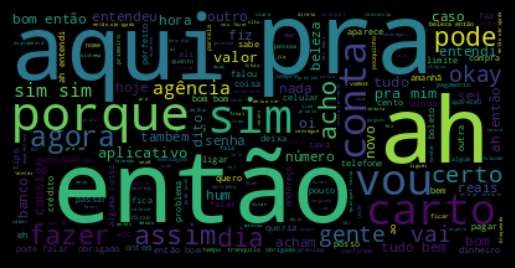

In [675]:
from wordcloud import WordCloud


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(full_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Choosing Sets

In [676]:
sent.query('rating < 3.0').clean_comment

30     ah ento ento vou ter documento pra funcionar p...
40     agncia conta dia rua padre jogo paulo nmero si...
63     caso troquei troquei pro black fiz substituir ...
72     polia maria ver rodrigues santos quer utilizar...
76     sogro fraga bem obrigado eletrnica bloqueou ap...
97                                                      
132    automaticamente vo saber onde agncia ah bom en...
184    valor carta certo certo certo certo certo cert...
225    bom dia bom dia queria saber faz pra liberar f...
236    ento falou acho deu certo deixou pode agora va...
273                                                     
Name: clean_comment, dtype: object

In [677]:
comments = sent.clean_comment.values
classes = sent.rating.values
classes

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5.,
       5., 4., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 1., 5., 5., 5., 5.,
       5., 5., 4., 5., 2., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 3., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 4., 5., 2., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5., 5., 1., 5., 5.,
       5., 4., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 4., 5., 4., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 1.

**Vectorizer**

Bow

In [678]:
vectorizer = CountVectorizer(ngram_range=(1,1))
freq_rating = vectorizer.fit_transform(comments)

TF-IDF

In [679]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    sublinear_tf= True,
    lowercase=True,
    norm= False, 
    ngram_range= (1,1),
    use_idf=False,
    binary=True,
    smooth_idf=False
)

freq_rating = tfidf.fit_transform(comments)

In [680]:
X = tfidf.fit_transform(sent.clean_comment.values).toarray()
y = sent.rating.values

In [681]:
X.shape, y.shape

((305, 2011), (305,))

Sets

In [682]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(freq_rating, classes, test_size=0.1, random_state=42)

Model

In [683]:
import xgboost as xgb
model_ml = xgb.XGBClassifier()
model_ml.fit(freq_rating, classes)

[00:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\victo\anaconda3\envs\dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [684]:
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

import tensorflow.python.keras.backend as K 
sess = K.get_session()

n_inputss = X.shape[1]

def define_sequential_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
	return model

In [685]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [686]:
model = define_sequential_model(X.shape[1], 1)
model.fit(X, y, verbose=1, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: -3.5558 - accuracy: 0.0295
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: -15.1798 - accuracy: 0.0295
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: -30.9513 - accuracy: 0.0295
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: -50.8457 - accuracy: 0.0295
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: -75.7672 - accuracy: 0.0295
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: -106.5967 - accuracy: 0.0295
Epoch 7/100
10/10 [==============================] - 0s 977us/step - loss: -143.1133 - accuracy: 0.0295
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: -185.9877 - accuracy: 0.0295
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: -235.0362 - accuracy: 0.0295
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: -291.5447 - 

In [691]:
tests = [ "vou na agencia na sexta feira falar com o gerente",
          "Muito obrigado por resolver meu problema, amei seu atendimento",
          "OK, fico no aguardo",
          "Eu ja não sei mais porque vivo a sofrer"]

vect_test = tfidf.transform(tests)
tests_predict = model_ml.predict(vect_test)
tests_predict

array([5., 5., 5., 5., 5.])

Métricas

In [688]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [689]:
model_ml.fit(X_train, y_train)
predict = model_ml.predict(X_test)
print('F1-Score: ', f1_score(predict, y_test, average='macro'))
print('Precision: ', precision_score(predict, y_test, average='macro'))
print('Recall: ', recall_score(predict, y_test, average='macro'))

[00:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1-Score:  0.3222222222222222
Precision:  0.3333333333333333
Recall:  0.3118279569892473


c:\Users\victo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
